In [1]:
import loompy
import numpy as np
import os

KeyboardInterrupt: 

In [145]:
loom = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/celltype_build/data/Hypothalamus.agg.loom'
loom = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/celltype_build/data/Hypothalamus.loom'

In [126]:
ds = loompy.connect(loom)
ds

,,,,Age,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,...
,,,,CellCycle,0.0023892871034061234,0.0007374631268436578,0.0029376564030029377,0.0015369681281346061,0.0017475143115396204,0.0016188123029735025,0.0018143621084797555,0.002349509843636069,0.0015413908785928006,0.0017541936191207102,...
,,,,CellCycle_G1,0.0009446018780907929,0.0003687315634218289,0.0006528125340006528,0.0006471444750040447,0.0007231093702922567,0.00017040129504984237,0.0003819709702062643,0.0005671230657052581,0.0005440203100915768,0.0007674597083653108,...
,,,,CellCycle_G2M,0.0014446852253153304,0.0003687315634218289,0.002284843869002285,0.0008898236531305614,0.0010244049412473637,0.0014484110079236601,0.0014323911382734913,0.001782386777930811,0.000997370568501224,0.0009867339107553995,...
,,,,CellCycle_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
,,,,CellID,10X362_5:CACTGAACAAATGGAT,10X362_6:CTCTGGTCAATGAGCG,10X362_6:CTCTCGACAGGGAGAG,10X362_6:TTCTAGTGTACTTCCC,10X362_6:CCGTGAGTCATTTGCT,10X362_6:AGGATAAGTACGAGTG,10X362_6:CGTCAAACAGCGCTTG,10X362_5:TTCTTGAAGCATGCAG,10X362_6:GAATCGTCAAGTCGTT,10X362_6:AATTCCTTCACTCTTA,...
,,,,Chemistry,v3,v3,v3,v3,v3,v3,v3,v3,v3,v3,...
,,,,Clusters,0,0,0,0,0,0,0,0,0,0,...
,,,,ClustersCollected,239,239,239,239,239,239,239,239,239,239,...
,,,,CreationDate,20240403T014933.316466Z,20240403T020557.789425Z,20240403T020557.789425Z,20240403T020557.789425Z,20240403T020557.789425Z,20240403T020557.789425Z,20240403T020557.789425Z,20240403T014933.316466Z,20240403T020557.789425Z,20240403T020557.789425Z,...
,,,,Donor,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,...


In [127]:
ds.close()

In [146]:
with loompy.connect(loom) as ds:
    #print(np.min(ds.ca['TotalUMI']))
    #print(np.unique(ds.ca['Clusters']))
    #print(np.unique(ds.ca['Age']))
    #auto = ds.ca['AutoAnnotation']
    #ncells = ds.ca['NCells']
    clusters = ds.ca['Clusters']
    #print(ds.layers.keys())

In [147]:
max(clusters)

242

In [131]:
len(np.unique(clusters))

243

In [39]:
celltypes = {}
for i, ct in enumerate(auto):
    if ct not in celltypes.keys():
        celltypes[ct] = ncells[i]
    else:
        celltypes[ct] += ncells[i]

cts, ct_counts = [], []
for ct, ct_count in celltypes.items():
    cts.append(ct)
    ct_counts.append(ct_count)

In [57]:
cluster_names = {}
for cluster in clusters:
    cluster_names[cluster] = auto[cluster]

### Making celltype plot

In [21]:
import matplotlib.pyplot as plt

In [46]:
out_path = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/plots/celltypes_bar.png'

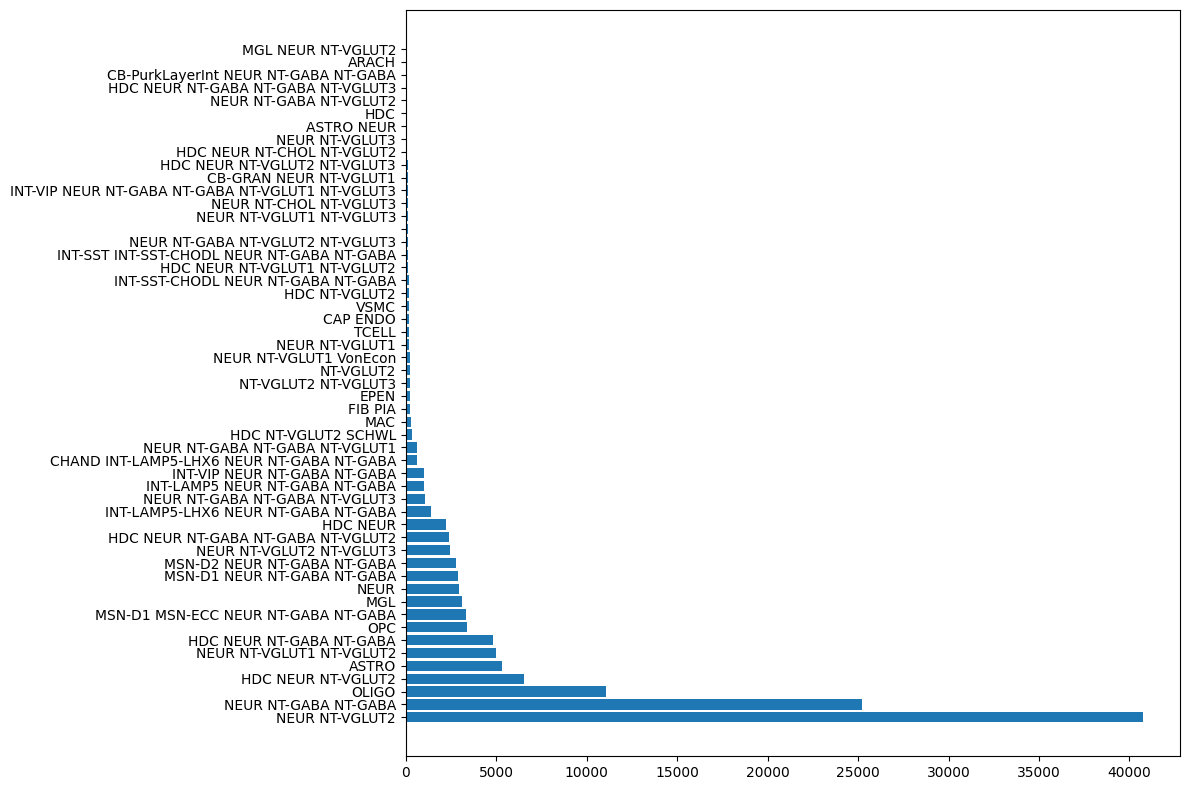

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
ct_idx = np.argsort(ct_counts)[::-1]
cts = np.array(cts)[ct_idx]
ct_counts = np.array(ct_counts)[ct_idx]
y = np.arange(len(cts))
ax.barh(y, ct_counts)
ax.set_yticks(y)
ax.set_yticklabels(cts)
plt.tight_layout()
plt.savefig(out_path, dpi=300)
plt.show()

# Writing mtx tsvs from the non-aggregate loom file

In [71]:
loom = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/linnarson/hypo_looms/10X190_5.loom'

In [50]:
ds = loompy.connect(loom)
ds

,,,Age,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...
,,,CellCycle,0.000562271577171774,0.0028328611898017,0.0008845643520566122,0.0009161704076958314,0.0,0.002107481559536354,0.0023076923076923075,0.002031832035218422,0.001317089232795522,0.0017513134851138354,...
,,,CellID,10X190_5:GGGACCTAGTATGTAG,10X190_5:CAGGCCATCAGCAATC,10X190_5:GGCGTCAGTCGTCAGC,10X190_5:TGTCCTGTCCGATGCG,10X190_5:CTGTATTAGCGCTGAA,10X190_5:GCCATTCTCCGTGGGT,10X190_5:CTACGGGTCATTGTTC,10X190_5:CATCCCACAGCTATAC,10X190_5:TCACGCTTCGTGCGAC,10X190_5:CATCGTCTCTTTCCAA,...
,,,Chemistry,v3,v3,v3,v3,v3,v3,v3,v3,v3,v3,...
,,,Clusters,0,1,1,1,1,1,1,1,1,1,...
,,,Donor,H18.30.002,H18.30.002,H18.30.002,H18.30.002,H18.30.002,H18.30.002,H18.30.002,H18.30.002,H18.30.002,H18.30.002,...
,,,NGenes,1951.0,1576.0,1469.0,1445.0,1039.0,1676.0,1594.0,1672.0,1761.0,1547.0,...
,,,ROIGroupCoarse,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,ROIGroupFine,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,Roi,HTHtub,HTHtub,HTHtub,HTHtub,HTHtub,HTHtub,HTHtub,HTHtub,HTHtub,HTHtub,...
,,,SampleID,10X190_5,10X190_5,10X190_5,10X190_5,10X190_5,10X190_5,10X190_5,10X190_5,10X190_5,10X190_5,...


In [51]:
ds.close()

In [72]:
with loompy.connect(loom) as ds:
    clusters = ds.ca['Clusters']
    print(ds.layers.keys())

['']


In [62]:
np.unique(clusters)

array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  14,
        15,  16,  22,  25,  26,  27,  31,  33,  34,  35,  36,  37,  40,
        41,  42,  43,  44,  45,  46,  47,  49,  52,  54,  56,  58,  59,
        60,  61,  62,  63,  64,  65,  70,  71,  72,  73, 166, 167, 170,
       171, 174, 175, 236, 237, 246, 250, 257, 258, 259, 260, 264, 265,
       266, 267, 269, 271, 272, 273, 274, 275, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
       296, 313, 323, 326, 328, 329, 330, 331, 332, 333, 363, 365, 366,
       373, 376, 377, 378, 382, 383, 384, 385, 390, 391, 392, 393, 397,
       402, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 421, 422,
       425, 428, 431, 432, 433, 435, 437, 438, 439, 441, 444])

# Original 3.3M .loom

In [133]:
loom = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/linnarson/adult_human_20221007.loom'

In [134]:
with loompy.connect(loom) as ds:
    #clusters = ds.ca['Clusters']
    #tissues = ds.ca['Tissue']
    #print(ds.layers.keys())
    clusters = ds.ca['Clusters']

In [135]:
len(np.unique(clusters))

461

In [122]:
tissue, counts = np.unique(tissues, return_counts=True)

In [123]:
tissue

array(['Amygdaloid complex (AMY) - Basolateral nuclear group (BLN) - lateral nucleus - La',
       'Amygdaloid complex (AMY) - Central nuclear group - CEN',
       'Amygdaloid complex (AMY) - Corticomedial nuclear group (CMN) - anterior cortical nucleus - CoA',
       'Amygdaloid complex (AMY) - basolateral nuclear group (BLN) - basolateral nucleus (basal nucleus) - BL',
       'Amygdaloid complex (AMY) - basolateral nuclear group (BLN) - basomedial nucleus (accessory basal nucleus) - BM',
       'Amygdaloid complex (AMY) - corticomedial nuclear group - CMN',
       'Basal forebrain (BF) - septal nuclei - SEP',
       'Basal forebrain (BF) - substantia innominata and nearby nuclei - SI',
       'Basal nuclei (BN) - Body of the Caudate - CaB',
       'Basal nuclei (BN) - Globus pallidus (GP) - External segment of globus pallidus - GPe',
       'Basal nuclei (BN) - Globus pallidus (GP) - Internal segment of globus pallidus - GPi',
       'Basal nuclei (BN) - Nucleus Accumbens - NAC',
   

In [124]:
counts

array([ 28984,  42699,  10778,  35285,  31090,  38331,  40815,  38205,
        32678,  50830,  33968,  30132,  34416,  11265,  28724,   8077,
        40191,  71874,  52045,  28028,  32745,  50362,  35359,  34078,
        32157,  32638,  28051,  34949,  14352,  38259,  29522,  33484,
        39696, 107301,  31065,  31899,  42834,  23732,  38188,  34919,
        40677, 116576,  24808,  38937,  37767,  40565,  29674,  39053,
        35290,  37642,  32790,  40165,  24327,  34933,  19398,  39147,
        37911,  12461,  35350,  10099,  28155,  18728,  14979,  20027,
        12557,   7265,   9488,  13173,  32306,  14094,  33794,  25875,
        59505,  49110,  29907,   4714,  27210,  23120,  21534,  13623,
        31230,  36941,  17535,  33641,  24155,  49512,  23349,  47416,
        26095,  24190,  36886,  56367,  22170,  31307,   8573,  27111,
        20162,  24354,  12944,  46453,  17660,  26172,   6877,  13382,
        20916,  48856,  14226])

### h5 neurons file

In [105]:
import h5py

In [106]:
h5 = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/linnarson/Neurons.h5ad'

In [111]:
with h5py.File(h5, 'r') as f:
    for key in f['obs'].keys():
        try:
            print(f"{key}: {f['obs'][key]['categories'][()]}")
        except ValueError as err:
            print(f"{key}: no categories")

CellID: no categories
ROIGroup: ['Cerebral cortex' 'Cerebral nuclei' 'Epithalamus' 'Hindbrain'
 'Hippocampus' 'Hypothalamus' 'Midbrain' 'Paleocortex' 'Spinal cord'
 'Thalamus']
ROIGroupCoarse: ['Cerebellum' 'Cerebral cortex' 'Cerebral nuclei' 'Hippocampus'
 'Hypothalamus' 'Midbrain' 'Myelencephalon' 'Pons' 'Spinal cord'
 'Thalamus']
ROIGroupFine: ['Amygdaloid complex' 'Basal forebrain' 'Basal nuclei' 'Cerebellum'
 'Cerebral cortex' 'Claustrum' 'Extended amygdala' 'Hippocampus'
 'Hypothalamus' 'Midbrain' 'Myelencephalon' 'Pons' 'Spinal cord'
 'Thalamus']
assay_ontology_term_id: ['EFO:0009922']
cell_cycle_score: no categories
cell_type_ontology_term_id: ['CL:0000540' 'CL:0000738']
cluster_id: [  0   1   2   3  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152

### Test h5 file from cellxgene website

In [ ]:
h5_test = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/cellxgene_datasets/hypo17.h5ad'

In [104]:
with h5py.File(h5_test, 'r') as f:
    #print(f'Keys: {f.keys()}')
    print(f['obs'].keys())
    print(f['obs']['cell_type']['categories'][()])
    print(f['obs']['cluster_id']['categories'][()])


<KeysViewHDF5 ['CellID', 'assay', 'assay_ontology_term_id', 'cell_cycle_score', 'cell_type', 'cell_type_ontology_term_id', 'cluster_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'dissection', 'donor_id', 'fraction_mitochondrial', 'fraction_unspliced', 'is_primary_data', 'observation_joinid', 'organism', 'organism_ontology_term_id', 'roi', 'sample_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'subcluster_id', 'supercluster_term', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'total_UMIs', 'total_genes']>
['fibroblast' 'ependymal cell' 'endothelial cell' 'astrocyte'
 'oligodendrocyte' 'vascular associated smooth muscle cell' 'neuron'
 'pericyte' 'leukocyte' 'central nervous system macrophage'
 'oligodendrocyte precursor cell']
[  1   3   4   6   7   8   9  10  11  12  14  15  16  17  18  19  20  21
  22  25  26  27  28  32  33  34  35  36  37  38 

In [110]:
with h5py.File(h5_test, 'r') as f:
    for key in f['obs'].keys():
        try:
            print(f"{key}: {f['obs'][key]['categories'][()]}")
        except ValueError as err:
            print(f"{key}: no categories")

CellID: no categories
assay: ["10x 3' v3"]
assay_ontology_term_id: ['EFO:0009922']
cell_cycle_score: no categories
cell_type: ['fibroblast' 'ependymal cell' 'endothelial cell' 'astrocyte'
 'oligodendrocyte' 'vascular associated smooth muscle cell' 'neuron'
 'pericyte' 'leukocyte' 'central nervous system macrophage'
 'oligodendrocyte precursor cell']
cell_type_ontology_term_id: ['CL:0000057' 'CL:0000065' 'CL:0000115' 'CL:0000127' 'CL:0000128'
 'CL:0000359' 'CL:0000540' 'CL:0000669' 'CL:0000738' 'CL:0000878'
 'CL:0002453']
cluster_id: [  1   3   4   6   7   8   9  10  11  12  14  15  16  17  18  19  20  21
  22  25  26  27  28  32  33  34  35  36  37  38  39  40  41  44  45  46
  47  49  56  60  61  62  63  65  67  68  71  90 103 121 122 124 129 130
 137 138 142 148 237 238 242 252 261 262 264 267 269 270 271 273 274 278
 279 282 283 284 286 287 293 294 296 307 310 311 313 323 324 325 326 327
 328 329 330 331 332 333 336 343 349 351 354 355 362 365 366 368 373 376
 377 378 381 383 384 38

# Writing the annotated hypothalamus loom to comet-format tsv

In [ ]:
import pandas as pd
import scipy.sparse as sparse

In [20]:
loom = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/celltype_build/data/Hypothalamus.loom_249193.08994212776'

In [ ]:
ds = loompy.connect(loom)
ds

In [ ]:
ds.close()

In [ ]:
with loompy.connect(loom) as ds:
    bcs = ds.ra['CellID']
    genes = ds.ca['Accession']
    mtx = ds.sparse()

In [ ]:
# need to do this per celltype:
df = pd.DataFrame(data=mtx, index=genes, columns=bcs)
out_path = ''
df.to_csv(sep='\t', index_col=0, header=0)

# Look at an individual Hypothalamus .loom I wrote out to see if it has the 461 clusters preserved

In [139]:
loom = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/linnarson/hypo_looms/10X392_4.loom'

In [140]:
ds = loompy.connect(loom)
ds

,,,Age,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,...
,,,CellCycle,0.0008639308855291577,0.003320420586607637,0.0033738191632928472,0.0017346053772766695,0.00035842293906810036,0.0014947683109118087,0.0032679738562091504,0.0004,0.0004210526315789474,0.0009857072449482504,...
,,,CellID,10X392_4:TTTATGCTCCACGTGG,10X392_4:ACTACGAAGAGTTGAT,10X392_4:TTGGTTTGTCCTGAAT,10X392_4:TGATCTTAGGTACATA,10X392_4:TCGACGGTCAATCCGA,10X392_4:CTTCGGTGTCTAGGTT,10X392_4:CACCAAAGTTACCTGA,10X392_4:GTCATGAAGGGCTTCC,10X392_4:TGGGCTGGTGTAGCAG,10X392_4:GTGCTTCCATCCTTGC,...
,,,Chemistry,v3,v3,v3,v3,v3,v3,v3,v3,v3,v3,...
,,,Clusters,1,1,1,1,1,1,1,5,5,6,...
,,,Donor,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,...
,,,NGenes,1436.0,1164.0,1006.0,757.0,1638.0,877.0,1355.0,1574.0,1339.0,1345.0,...
,,,ROIGroupCoarse,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,ROIGroupFine,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,Roi,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,HTHso-HTHtub,...
,,,SampleID,10X392_4,10X392_4,10X392_4,10X392_4,10X392_4,10X392_4,10X392_4,10X392_4,10X392_4,10X392_4,...


In [141]:
ds.close()

In [142]:
with loompy.connect(loom) as ds:
    clusters = ds.ca['Clusters']

# Look at the combined hypothalamus I combined to verify the 461 clusters

In [155]:
loom = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/linnarson/hypo_looms/all_hypothalamus.loom'

In [156]:
ds = loompy.connect(loom)
ds

,,,Age,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,...
,,,CellCycle,0.0009416195856873823,0.0,0.0016556291390728477,0.0009004952723998199,0.0,0.002124645892351275,0.0009905894006934125,0.0016926201760324982,0.0012698412698412698,0.0018467220683287165,...
,,,CellID,10X360_7:GTTGTAGCAAGTACCT,10X360_7:GCCAACGCAGTCTCTC,10X360_7:GTCGTTCTCCCTCTAG,10X360_7:GCCGATGGTTGCTTGA,10X360_7:CTCCCAACAACAAGTA,10X360_7:AAACGCTGTCGTAATC,10X360_7:AACCACATCAGACTGT,10X360_7:TGACTCCTCCGGACTG,10X360_7:GTGAGGATCGACATCA,10X360_7:CGGTCAGAGTAACGAT,...
,,,Chemistry,v3,v3,v3,v3,v3,v3,v3,v3,v3,v3,...
,,,Clusters,1,3,3,6,6,6,6,6,6,6,...
,,,Donor,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,...
,,,NGenes,775.0,1008.0,855.0,1407.0,961.0,997.0,1331.0,1645.0,1120.0,856.0,...
,,,ROIGroupCoarse,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,ROIGroupFine,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,Roi,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,...
,,,SampleID,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,...


In [157]:
ds.close()

In [158]:
with loompy.connect(loom) as ds:
    clusters = ds.ca['Clusters']

In [159]:
len(np.unique(clusters))

345

In [160]:
np.max(clusters)

459

# Kyle Pipeline

In [1]:
import loompy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
all_hypo_path = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/raw/linnarson/hypo_looms/all_hypothalamus.loom'
meta_path = '/lustre/orion/syb111/proj-shared/Projects/scrna-seq/data/human/brain/healthy/nemo/meta/linnarson_cluster_metadata.tsv'

In [3]:
meta = pd.read_csv(meta_path, sep='\t', header=0, index_col=None)
# last row is all nans
meta = meta.iloc[:-1, :]
meta = meta.replace(np.nan, 'NONE')

In [4]:
meta

,Cluster ID,Cluster name,Supercluster,Class auto-annotation,Neurotransmitter auto-annotation,Neuropeptide auto-annotation,Subtype auto-annotation,Transferred MTG Label,Top three regions,Top three dissections,...,DoubletFinder score,Total UMI,Fraction unspliced,Fraction mitochondrial,H19.30.002,H19.30.001,H18.30.002,H18.30.001,Fraction cells from top donor,Number of donors
0,0.0,Bcell_0,Miscellaneous,BCELL,NONE,NONE,NONE,NONE,"Midbrain: 21.0%, Basal forebrain: 19.0%, Pons:...","Human GPi: 11.4%, Human SN: 11.4%, Human SN-RN...",...,0.013358,2258.866667,0.608113,0.020989,58.0,20.0,27.0,0.0,0.552381,3.0
1,1.0,Tcell_1,Miscellaneous,TCELL,NONE,NONE,NONE,NONE,"Midbrain: 15.0%, Basal forebrain: 14.0%, Pons:...","Human SpC: 8.2%, Human CbDN: 7.6%, Human SN: 7.4%",...,0.022371,2184.314470,0.582884,0.021212,708.0,400.0,1364.0,2.0,0.551334,4.0
2,2.0,Nkcell_2,Miscellaneous,NK,NONE,NONE,NONE,NONE,"Thalamus: 17.6%, Cerebral cortex: 15.5%, Basal...","Human GPe: 5.7%, Human GPi: 5.5%, Human CbDN: ...",...,0.023788,2263.348733,0.558228,0.020093,245.0,126.0,300.0,0.0,0.447094,3.0
3,3.0,Mono_3,Miscellaneous,MONO,NONE,NAMPT,NONE,NONE,"Thalamus: 21.9%, Pons: 16.1%, Basal forebrain:...","Human PnEN: 8.9%, Human MoAN: 6.6%, Human PnRF...",...,0.033228,2407.775348,0.569642,0.051117,195.0,112.0,196.0,0.0,0.389662,3.0
4,4.0,Mgl_4,Microglia,MGL,NONE,NAMPT,NONE,Micro-PVM,"Spinal cord: 31.8%, Pons: 26.0%, Medulla: 13.2%","Human SpC: 31.8%, Human MN: 11.5%, Human PnEN:...",...,0.013653,2439.644295,0.672263,0.005221,176.0,135.0,434.0,0.0,0.582550,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,456.0,Thex_456,Thalamic excitatory,NEUR,VGLUT2,ADCYAP CART CBLN CCK CHGA CHGB CRH NAMPT NUCB ...,NONE,NONE,"Thalamus: 99.8%, Hippocampus: 0.2%, Cerebral c...","Human LG: 92.5%, Human Pul: 3.7%, Human MG: 2.0%",...,0.048133,18287.550098,0.721453,0.013957,115.0,239.0,155.0,0.0,0.469548,3.0
457,457.0,Thex_457,Thalamic excitatory,NEUR,VGLUT2,ADCYAP CART CHGA CHGB CRH NAMPT NMU NTS NUCB N...,NONE,NONE,"Thalamus: 98.3%, Amygdala: 1.4%, Cerebral cort...","Human ANC: 93.9%, Human ETH: 1.7%, Human BNST:...",...,0.047489,55944.577703,0.750655,0.017966,5.0,19.0,271.0,1.0,0.915541,4.0
458,458.0,Thex_458,Thalamic excitatory,NEUR,VGLUT2,ADCYAP ADM CART CBLN CCK CHGA CHGB CRH GAL NAM...,NONE,NONE,"Thalamus: 93.6%, Midbrain: 6.4%, Amygdala: 0.0%","Human ETH: 22.6%, Human MD: 19.4%, Human ANC: ...",...,0.055089,50532.688818,0.694875,0.020041,1786.0,3097.0,2611.0,0.0,0.413264,3.0
459,459.0,Thex_459,Thalamic excitatory,NEUR,VGLUT2,ADCYAP CBLN CCK CHGA CHGB NAMPT NMU NTS NUCB N...,NONE,NONE,"Thalamus: 89.9%, Amygdala: 9.2%, Midbrain: 0.6%","Human MD: 26.0%, Human CM-Pf: 20.8%, Human ANC...",...,0.068357,48031.598402,0.692641,0.022784,2111.0,1471.0,919.0,6.0,0.468383,4.0


In [5]:
celltypes = meta.loc[:, 'Class auto-annotation'].values
uniq_cts, ct_counts = np.unique(celltypes, return_counts=True)
for i, uniq_ct in enumerate(uniq_cts):
    print(f'{uniq_ct}: {ct_counts[i]}')

ASTRO: 14
BCELL: 1
CHRP: 8
CHRP ENDO: 1
CHRP EPEN: 4
CHRP EPEN NEUR: 1
CHRP EPEN OLIGO: 1
CHRP NEUR: 1
ENDO: 5
ENDO VSMC: 1
EPEN: 6
FIB: 5
MAC: 1
MGL: 8
MONO: 1
NEUR: 361
NK: 1
NONE: 18
OLIGO: 14
OPC: 5
PER: 2
TCELL: 1
VSMC: 1


### Subset 461 clusters to 383 auto-annotation clusters
Keep neuronal clusters ('NEUR') separated, collapse all others

In [6]:
peptides = meta.loc[:, 'Neuropeptide auto-annotation'].values

In [7]:
new_clusters = []
cluster_check = {}
peptide_check = {}
cluster_num = 0
for i, ct in enumerate(celltypes):
    if ct == 'NEUR':
        peptide = peptides[i]
        if peptide in peptide_check.keys():
            new_clusters.append(peptide_check[peptide])
        else:
            peptide_check[peptide] = cluster_num
            new_clusters.append(cluster_num)
            cluster_num += 1
        continue
    if ct in cluster_check.keys():
        new_clusters.append(cluster_check[ct])
    else:
        cluster_check[ct] = cluster_num
        new_clusters.append(cluster_check[ct])
        cluster_num += 1

In [8]:
meta.loc[:, 'auto_annotation_clusters'] = new_clusters

In [9]:
meta.loc[meta.loc[:, 'auto_annotation_clusters'] == 100, :]

,Cluster ID,Cluster name,Supercluster,Class auto-annotation,Neurotransmitter auto-annotation,Neuropeptide auto-annotation,Subtype auto-annotation,Transferred MTG Label,Top three regions,Top three dissections,...,Total UMI,Fraction unspliced,Fraction mitochondrial,H19.30.002,H19.30.001,H18.30.002,H18.30.001,Fraction cells from top donor,Number of donors,auto_annotation_clusters
209,209.0,MSN_209,Medium spiny neuron,NEUR,GABA,CHGB NAMPT NUCB PDYN PENK SCG TAC UBL UCN VGF ...,MSN-D1,NONE,"Basal forebrain: 96.3%, Thalamus: 2.9%, Amygda...","Human CaB: 77.9%, Human Pu: 8.2%, Human NAC: 5.1%",...,32444.176337,0.721736,0.005888,3849.0,3816.0,3745.0,0.0,0.337336,3.0,100
211,211.0,MSN_211,Medium spiny neuron,NEUR,GABA,CHGB NAMPT NUCB PDYN PENK SCG TAC UBL UCN VGF ...,MSN-D1,NONE,"Basal forebrain: 85.7%, Amygdala: 6.3%, Cerebr...","Human CaB: 26.7%, Human NAC: 18.8%, Human Pu: ...",...,30213.506214,0.728274,0.004777,2484.0,3640.0,2969.0,0.0,0.400308,3.0,100


In [10]:
len(np.unique(meta.loc[:, 'auto_annotation_clusters']))

305

### Neuropeptide heatmaps

In [45]:
# note: omitted duplicatesn
# kx2-1 from arc
# sim1 from pvh
# lhx1 from scn
herb_genes = {'ARC': ['GLP1R', 'TBX3', 'POMC', 'ISL1', 'CRABP1', 'AGRP', 'KISS1', 'LEPR', 'GHRH', 'GSX1', 'HMX2', 'PGR', 'ESR1', 'LEF1'],
              'TM': ['HDC'],
              'PVH': ['POU3F2', 'OXT', 'CRH', 'AVP', 'NHLH2', 'MC4R', 'PRDM8'],
              'VMH': ['NR5A1', 'FEZF1', 'GABRA5', 'NPTX2', 'SOX14', 'NKX2-1'],
              'MN': ['PITX2', 'FOXB1', 'LHX1', 'SIM1', 'FEZF2'],
              'SMN': ['FOXA1', 'IRX3', 'IRX5', 'BARHL1', 'NR4A2', 'LMX1A', 'FOXP2', 'EBF1', 'TAC1'],
              'SCN': ['RGS16', 'SIX3', 'SIX6', 'VAX1', 'VIP', 'CCK'],
              'LH': ['LHX2', 'LHX9', 'PDYN', 'CARTPT', 'HCRT', 'PMCH', 'RFX4'],
              'PO': ['RELN', 'ARX', 'LHX6', 'NFIX', 'SOX6'],
              'DMH': ['LHX8', 'PPP1R17', 'GPR50'],
              'ZI': ['MEIS2']}

In [12]:
ds = loompy.connect(all_hypo_path)
ds

,,,Age,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,...
,,,CellCycle,0.0009416195856873823,0.0,0.0016556291390728477,0.0009004952723998199,0.0,0.002124645892351275,0.0009905894006934125,0.0016926201760324982,0.0012698412698412698,0.0018467220683287165,...
,,,CellID,10X360_7:GTTGTAGCAAGTACCT,10X360_7:GCCAACGCAGTCTCTC,10X360_7:GTCGTTCTCCCTCTAG,10X360_7:GCCGATGGTTGCTTGA,10X360_7:CTCCCAACAACAAGTA,10X360_7:AAACGCTGTCGTAATC,10X360_7:AACCACATCAGACTGT,10X360_7:TGACTCCTCCGGACTG,10X360_7:GTGAGGATCGACATCA,10X360_7:CGGTCAGAGTAACGAT,...
,,,Chemistry,v3,v3,v3,v3,v3,v3,v3,v3,v3,v3,...
,,,Clusters,1,3,3,6,6,6,6,6,6,6,...
,,,Donor,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,H19.30.001,...
,,,NGenes,775.0,1008.0,855.0,1407.0,961.0,997.0,1331.0,1645.0,1120.0,856.0,...
,,,ROIGroupCoarse,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,ROIGroupFine,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,Hypothalamus,...
,,,Roi,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,HTHma-HTHtub,...
,,,SampleID,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,10X360_7,...


In [13]:
ds.close()

In [46]:
# generate mapper from original to new cluster
cluster_mapper = {}
for i in range(meta.shape[0]):
    cluster_mapper[i] = new_clusters[i]

In [47]:
with loompy.connect(all_hypo_path) as loom:
    loom_bcs = loom.ca['CellID']
    loom_clusters = loom.ca['Clusters']
    loom_genes = loom.ra['Gene']

In [48]:
barcodes_by_cluster = {}
for i, bc in enumerate(loom_bcs):
    loom_cluster = loom_clusters[i]
    mapped_cluster = cluster_mapper[loom_cluster]
    if mapped_cluster in barcodes_by_cluster.keys():
        barcodes_by_cluster[mapped_cluster].append(bc)
    else:
        barcodes_by_cluster[mapped_cluster] = [bc]

In [49]:
max([len(x) for x in barcodes_by_cluster.values()])

20320

In [50]:
min([len(x) for x in barcodes_by_cluster.values()])

1

In [51]:
all_genes = [gene for sublist in herb_genes.values() for gene in sublist]

In [52]:
len(all_genes)

64

In [53]:
# get boolean idx for genes we care about
# and get those genes out of the mtx
# loompy only allows for one mask at a time
all_genes = [gene for sublist in herb_genes.values() for gene in sublist]
gene_mask = np.array([True if gene in all_genes else False for gene in loom_genes])
with loompy.connect(all_hypo_path) as loom:
    herb_gene_exp = loom[gene_mask, :]

In [66]:
ordered_genes = []
for gene in loom_genes:
    if gene in all_genes:
        ordered_genes.append(gene)

In [54]:
herb_gene_exp.shape

(64, 134471)

In [55]:
tmp1, tmp2 = np.unique(all_genes, return_counts=True)
for i, gene in enumerate(tmp1):
    break
    print(f'{gene}: {tmp2[i]}')

In [56]:
# this will not go in order of keys since its a dict
exp_by_cluster = {}
for cluster, bcs in barcodes_by_cluster.items():
    #print(cluster)
    bc_mask = np.array([True if bc in bcs else False for bc in loom_bcs])
    exp = herb_gene_exp[:, bc_mask]
    exp = np.log(exp + 1)
    exp_by_cluster[cluster] = np.mean(exp, axis=1)

In [57]:
len(exp_by_cluster.keys())

230

In [58]:
# combine data column-wise and keep track of which cluster is which
data = np.empty((len(all_genes), len(exp_by_cluster.keys())), dtype=float)
cluster_names = []
col_idx = 0
for cluster, col_data in exp_by_cluster.items():
    cluster_names.append(cluster)
    data[:, col_idx] = col_data
    col_idx += 1

In [91]:
# for clusters 266 and 138, what numba cells?
print(len(barcodes_by_cluster[266]))
print(len(barcodes_by_cluster[138]))

258
32


### Heatmap

In [86]:
# subsetting to where glp1r mean > 0
glp1r_row_idx = ordered_genes.index('GLP1R')
glp1r_exp = data[48, :]
glp1r_gv0_idx = glp1r_exp > 0
glp1r_data = data[:, glp1r_gv0_idx]
cols = np.array(cluster_names)[glp1r_gv0_idx]
df = pd.DataFrame(glp1r_data, rows, cols)

In [68]:
rows = ordered_genes
cols = cluster_names
df = pd.DataFrame(data, rows, cols)

In [85]:
len(cols)

99

In [84]:
glp1r_data.shape

(64, 99)

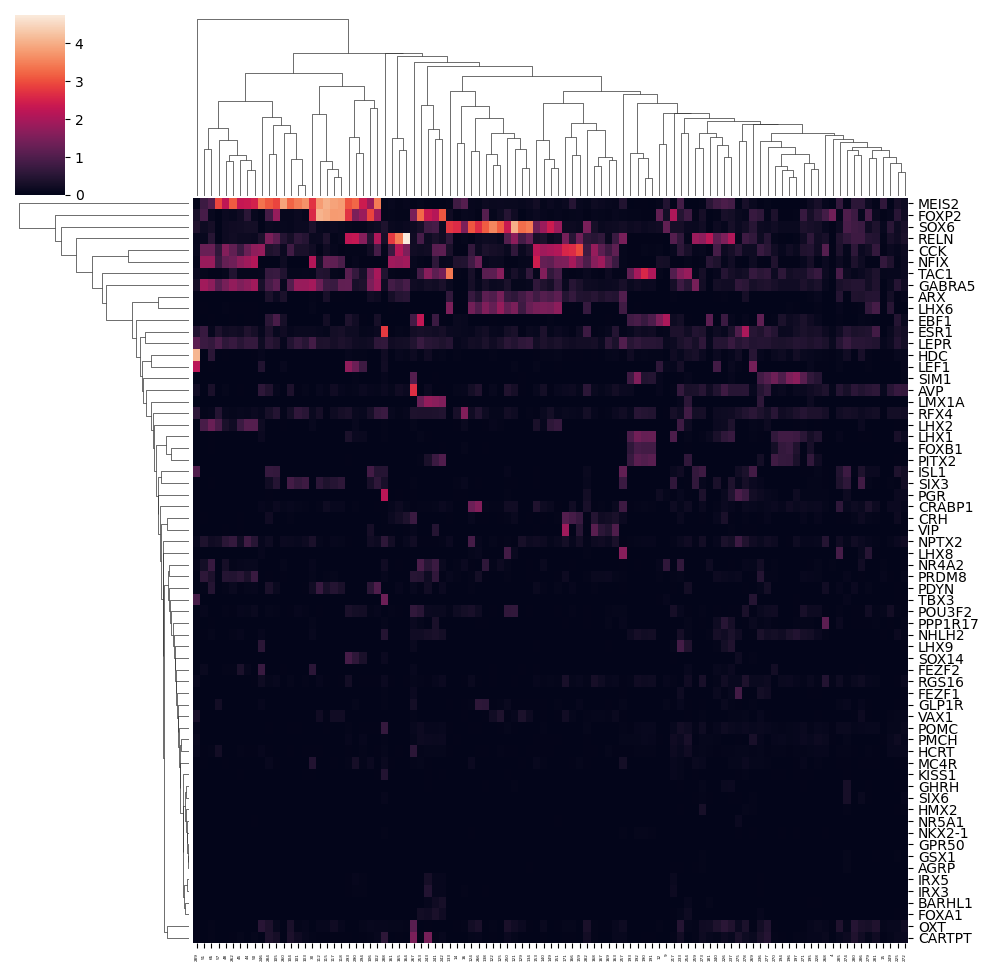

In [87]:
out_path = '/lustre/orion/syb111/proj-shared/Personal/jmerlet/projects/nemo/plots/glp1r_gv0.png'
plot = sns.clustermap(df, yticklabels=1, xticklabels=1)
plot.ax_heatmap.set_xticklabels(plot.ax_heatmap.get_xmajorticklabels(), fontsize=3)
plt.savefig(out_path, dpi=300)
plt.show()

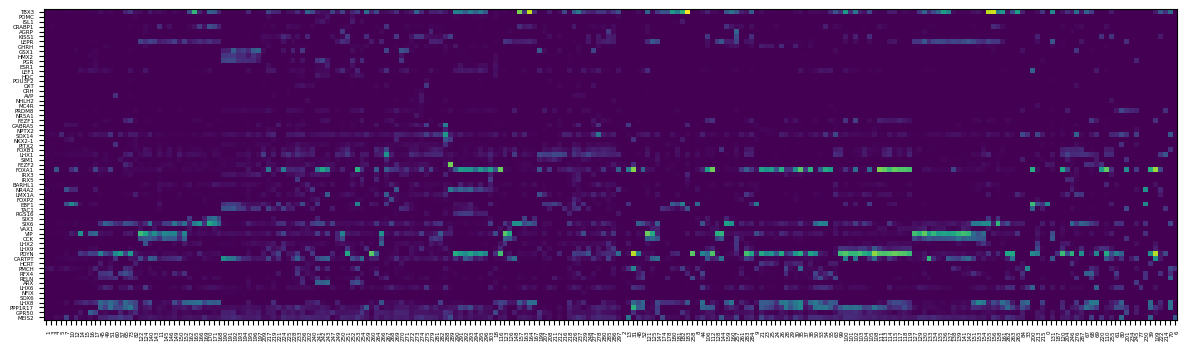

In [162]:
rows = all_genes
cols = cluster_names

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(data)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(cols)), labels=cols, fontsize=4)
ax.set_yticks(np.arange(len(rows)), labels=rows, fontsize=4)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()